In [1]:
# Setup
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"

def image_path(fig_id):
    return os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id)

def save_fig(fig_id, tight_layout=True):
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(image_path(fig_id) + ".png", format='png', dpi=300)

* Decision Trees : classification, regression tasks, and even multioutput tasks.

# Training and Visualizing a Decision Tree

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best')

In [11]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

<img src='decisionTree1.png' width=50%/>

<img src='decisionTree1' widht=50%>

* 정보이득 및 지니불순도/엔트로피
http://javacan.tistory.com/entry/Programming-CI-Study-ch7-DecisionTree



## Making Predictions

예측을 만들기 위해서 우선 분류 해야 한다. 

Root Node (depth 0, at the top) <br>
꽃잎 길이 (petal length) 가 2.45 보다 작으면 left node 는 setorsa 로 분류됨 

노드의 value 속성은이 노드가 적용되는 각 클래스의 교육 인스턴스 수를 알려줍니다. 

-- 지니 불순도는 집합에 이질적인 것이 얼마나 섞였는지를 측정하는 지표이며 CART 알고리즘에서 사용한다.

* white box vs black box : 모델의 결론도출 과정을 알 수 있는 경우와 없는 경우 

Saving figure decision_tree_decision_boundaries_plot


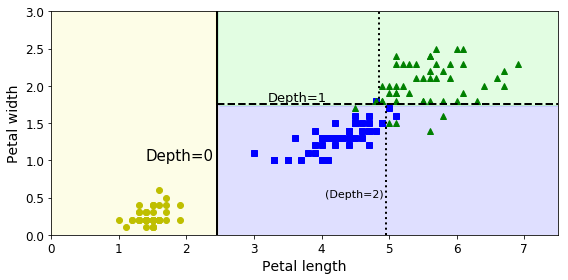

In [3]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap, linewidth=10)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

save_fig("decision_tree_decision_boundaries_plot")
plt.show()

## Estimating Class Probabilities
 
꽃의 길이와 넓이를 주고 클래스에 속할 확률이 어떻게 되는지 또는 어떤 꽃인지 구분 할수 있다. 

In [4]:
tree_clf.predict_proba([[5, 1.5]])

array([[ 0.        ,  0.90740741,  0.09259259]])

In [5]:
tree_clf.predict([[5, 1.5]])

array([1])

# The CART Training Algorithm

Classification And Regression Tree (CART)

<img src='decisionTree2.png' width=90% />

the CART algorithm is a greedy algorithm: 합리적이지만 최적의 알고리즘은 아니다. (최소의 depth 보단 그때그때 좋은 결정을함)

# Computational Complexity

노드를 root 에서 leaf 까지 훑는 대는 O(log2(m)) 복잡도가 나오지만, trining 시킬시에는 모든 속성에 대해서 비교해봐야 함으로 O(n × m log(m)) 가 나온다. 수천개이하의 인스턴스이면 presort=True 미리 정렬해서 사용하는 속성을 이용하면 빠르게 할수 있지만 인트턴스가 많아 질 수록 속도는 느려진다. 

# Gini Impurity or Entropy

데이터를 가장 잘 나눌 수 있는 특징을 먼저 찾아서 데이터 집합을 하위 집합으로 분할
정보 이득 (Informaion Gain) 이 가장 큰 특징 (현상태와 그다음상태의 정보 차이)

* 엔트로피 (Entropy 정보량) 정보량이 많다. = 선택사항이 많다. = 불확실 하다. = 복잡성, 불확정성

gini impurity, entropy 는 거의 유사한 트리를 만들어 내지만 gini impurity 가 약간 빨라서 기본값으로 많이 사용한다. 

* 차이점 
    - Gini impurity tends to isolate the most frequent class in its own branch of the tree
    - entropy tends to produce slightly more balanced trees.

# Regularization Hyperparameters


- **nonparametric model** not because it does not have any parameters (it often has a lot) but because the number of parameters is not determined prior to training, so the model structure is free to stick closely to the data. 

- **parametric model** such as a linear model has a predetermined number of parameters, so its degree of freedom is limited, reducing the risk of overfitting (but increasing the risk of underfitting).

overfitting 을 피하기 위해서 자유를 제한 해야 한다. <br>
의사결정트리에서는 주로 depth 를 제한한다. max_depth (sklearn 기본값 None) 

* DecisionTreeClassifier class 에서 제공하는 parameter 
    - min_samples_split : 분할되기 전에 노드에 있어야하는 최소 샘플 수
    - min_samples_leaf : 리프 노드가 가져야하는 샘플의 최소 수
    - in_weight_fraction_leaf : min_samples_leaf와 같지만 총 가중 인스턴스 수로 표시
    - max_leaf_nodes : 최대 리프 노드 수
    - max_features : 각 노드에서 분할을 위해 평가되는 피처의 최대 수
    
min_ hyperparameters를 늘리거나 max_ hyperparameters를 줄이면 모델이 정규화 됨



Saving figure min_samples_leaf_plot


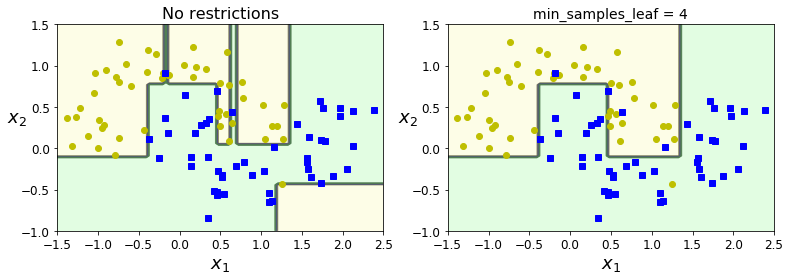

In [6]:
# moons 데이터셋 이용 (5장에서 사용한)
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("No restrictions", fontsize=16)
plt.subplot(122)
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)

save_fig("min_samples_leaf_plot")
plt.show()

왼쪽에서 결정 트리는 기본 하이퍼 매개 변수 (즉, 제한 없음)로 트레이닝되며, 오른쪽에서 결정 트리는 in_samples_leaf = 4로 트레이닝 된다.
왼쪽의 모델이 overfitting 이고 오른쪽의 모델이 더 잘 일반화 되었다. 

# Regression

회귀식 만들기 

In [7]:
# Quadratic training set + noise
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [8]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=42,
           splitter='best')

<img src='decisionTree3.png' width=80%/>

Saving figure tree_regression_plot


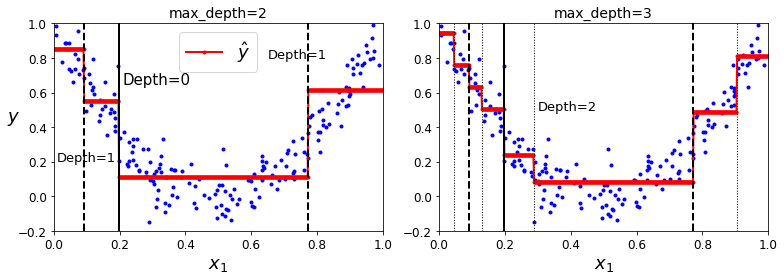

In [9]:
#InteractiveShell.ast_node_interactivity = "last-expr"

from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.subplot(122)
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)

save_fig("tree_regression_plot")
plt.show()

각 영역의 예상 값이 해당 영역의 인스턴스의 평균 목표 값의 방법을 사용하였다.

이 알고리즘은 대부분의 training data의 가능한 한 예측 값에 가깝게 만드는 방식으로 각 영역을 분할한다.

- CART 알고리즘은 MSE를 최소화하는 방식으로 트레이닝 세트를 분할하려고한다.
<img src='decisionTree4.png' width=80%/>

Saving figure tree_regression_regularization_plot


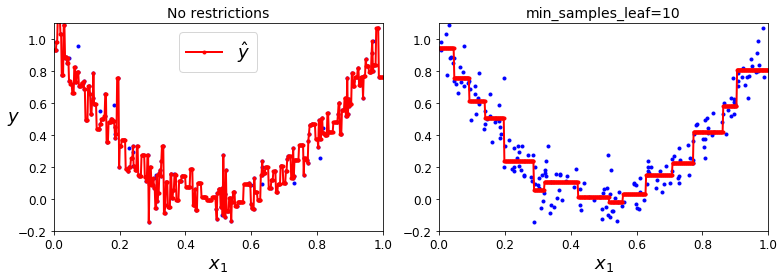

In [10]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)

plt.subplot(122)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)

save_fig("tree_regression_regularization_plot")
plt.show()

 min_samples_leaf=10 를 사용한 경우 overfitting 이 발생함을 알수 있음 

# Instability

* limitations
    - 1) Decision Trees love orthogonal decision boundaries (all splits are perpendicular to an axis), which makes them sensitive to training set rotation.

    이 문제를 제한하는 한 가지 방법은 PCA를 사용하는 것(8 장 참조). 이는 종종 training data 의 방향을 더 잘 나타내준다.


Saving figure sensitivity_to_rotation_plot


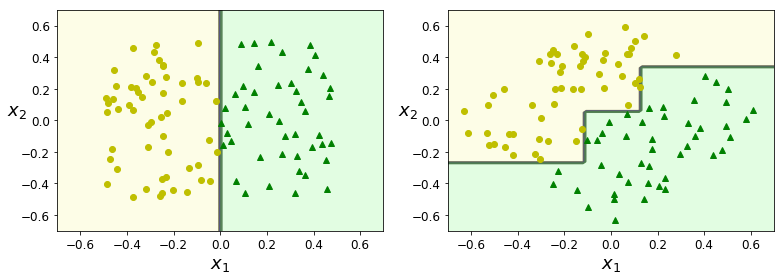

In [11]:
np.random.seed(6)
Xs = np.random.rand(100, 2) - 0.5
ys = (Xs[:, 0] > 0).astype(np.float32) * 2

angle = np.pi / 4
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xsr = Xs.dot(rotation_matrix)

tree_clf_s = DecisionTreeClassifier(random_state=42)
tree_clf_s.fit(Xs, ys)
tree_clf_sr = DecisionTreeClassifier(random_state=42)
tree_clf_sr.fit(Xsr, ys)

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_decision_boundary(tree_clf_s, Xs, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.subplot(122)
plot_decision_boundary(tree_clf_sr, Xsr, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)

save_fig("sensitivity_to_rotation_plot")
plt.show()

* 
    - 2) ecision Trees is that they are very sensitive to small variations in the training data.
    
    Scikit-Learn에 의해 사용 된 훈련 알고리즘이 확률 적이므로 (random_state hyperparameter를 설정하지 않는 한) 동일한 훈련 데이터에서도 매우 다른 모델을 얻을 수 있다.

Saving figure decision_tree_instability_plot


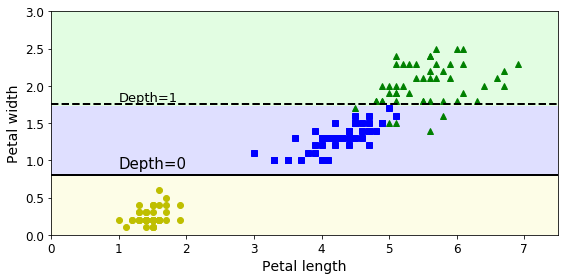

In [13]:
X = iris.data[:, 2:] # petal length and width
y = iris.target

X[(X[:, 1]==X[:, 1][y==1].max()) & (y==1)] # widest Iris-Versicolor flower

not_widest_versicolor = (X[:, 1]!=1.8) | (y==2)
X_tweaked = X[not_widest_versicolor]
y_tweaked = y[not_widest_versicolor]

tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X_tweaked, y_tweaked)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_tweaked, X_tweaked, y_tweaked, legend=False)
plt.plot([0, 7.5], [0.8, 0.8], "k-", linewidth=2)
plt.plot([0, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.0, 0.9, "Depth=0", fontsize=15)
plt.text(1.0, 1.80, "Depth=1", fontsize=13)

save_fig("decision_tree_instability_plot")
plt.show()

가장 넓은 아이리스 베르시 컬러를 제거하고 훈련한 결과 모양이 아주다르다. 